In [1]:
#import libraries for data exploration and processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [2]:
#import the sklearn for logistic regression model building,prediction and performance evaluation purposes

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [3]:
#load the dataset
data = pd.read_csv("social_media_data.csv")

In [4]:
#understanding the characteristics
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Post Content             97 non-null     object 
 1   Post Frequency           96 non-null     float64
 2   Time of Day              96 non-null     object 
 3   Hashtags                 96 non-null     object 
 4   User Engagement History  96 non-null     float64
 5   Post Format              96 non-null     object 
 6   Audience Demographics    96 non-null     object 
 7   Likes                    96 non-null     float64
 8   Comments                 96 non-null     float64
 9   Shares                   96 non-null     float64
dtypes: float64(5), object(5)
memory usage: 7.9+ KB


In [5]:
# Display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the entire DataFrame
print(data)


                                         Post Content  Post Frequency  \
0    Exciting news! Our new product is now available!             3.0   
1                      Check out this amazing recipe!             1.0   
2          Happy Friday! Join us for a special event.             2.0   
3                New blog post: "10 Tips for Success"             1.0   
4                 Exclusive offer! Limited time only.             1.0   
5                        Discover our new collection!             2.0   
6       Join our webinar on digital marketing trends.             1.0   
7         Throwback to our memorable event last week.             1.0   
8      Exciting announcement! Stay tuned for updates.             2.0   
9                      Get ready for our summer sale!             2.0   
10  New blog post: "Mastering Photography Techniques"             1.0   
11      Exciting giveaway! Enter for a chance to win.             1.0   
12  Join our fitness challenge and transform your .

In [6]:
#check for nulls
data.isnull().sum()

Post Content               2
Post Frequency             3
Time of Day                3
Hashtags                   3
User Engagement History    3
Post Format                3
Audience Demographics      3
Likes                      3
Comments                   3
Shares                     3
dtype: int64

In [7]:
data_cleaned = data.dropna()

In [8]:
data_cleaned.isnull().sum()

Post Content               0
Post Frequency             0
Time of Day                0
Hashtags                   0
User Engagement History    0
Post Format                0
Audience Demographics      0
Likes                      0
Comments                   0
Shares                     0
dtype: int64

In [9]:
print(data_cleaned)

                                         Post Content  Post Frequency  \
0    Exciting news! Our new product is now available!             3.0   
1                      Check out this amazing recipe!             1.0   
2          Happy Friday! Join us for a special event.             2.0   
3                New blog post: "10 Tips for Success"             1.0   
4                 Exclusive offer! Limited time only.             1.0   
5                        Discover our new collection!             2.0   
6       Join our webinar on digital marketing trends.             1.0   
7         Throwback to our memorable event last week.             1.0   
8      Exciting announcement! Stay tuned for updates.             2.0   
9                      Get ready for our summer sale!             2.0   
10  New blog post: "Mastering Photography Techniques"             1.0   
11      Exciting giveaway! Enter for a chance to win.             1.0   
12  Join our fitness challenge and transform your .

In [10]:
#define the target variable and independent variable
x=data_cleaned[['Likes','Comments','Shares']]
y=data_cleaned['User Engagement History']

In [11]:
#making labels array
labels = ['Likes','Comments','Shares']

In [12]:
print(x.max())
print(x.min())

Likes       500.0
Comments    110.0
Shares      150.0
dtype: float64
Likes       45.0
Comments    10.0
Shares       5.0
dtype: float64


In [13]:
min_max_scaler=preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X=pd.DataFrame(x_scaled)

In [14]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((76, 3), (20, 3), (76,), (20,))

In [16]:
# Initialize the logistic regression model
model = LogisticRegression()

In [17]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [18]:
# Predict on the test set
y_pred = model.predict(X_test)

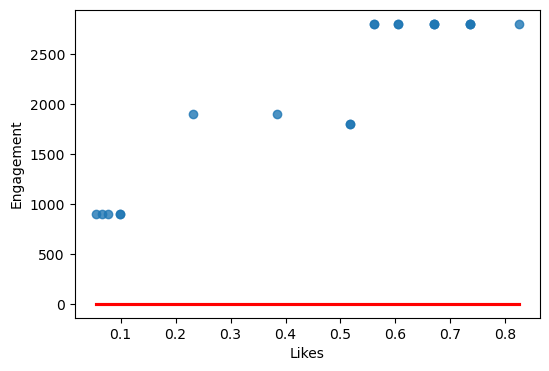

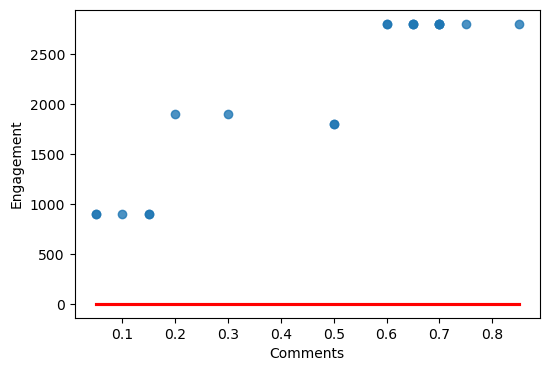

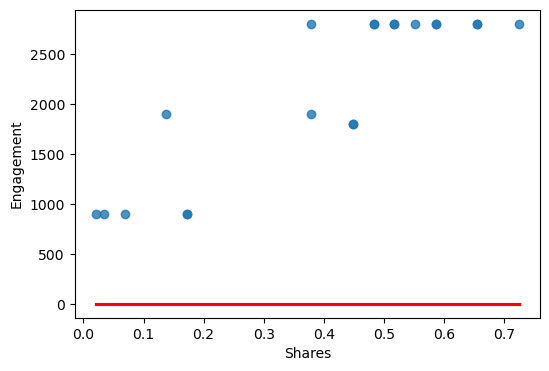

In [19]:
#visualising the graph of every variable against the outcome variable

for i in range(3):
    plt.figure(i,figsize=(6,4))
    plt.xlabel(labels[i])
    ax=sns.regplot(x=X_test[i],y=y_pred,data=data_cleaned,logistic=True,ci=None,line_kws={'color':'red'})
    ax.set(xlabel=labels[i],ylabel='Engagement')
    plt.show()

In [20]:
#look at the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]]


In [21]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

C:\Users\sandh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
print(accuracy)
print(precision)
print(recall)

0.25
0.0759090909090909
0.25
